# 07. Tidy Data
***

# 07-1 열과 피벗

## Wide Data (넓은 데이터)
* 열은 파이썬의 변수(variable)와 비슷한 역할 - 예) 사망한 날짜, 발병 국가
* 하지만, 열 자체가 값(value)을 의미하여 옆으로 길게 늘어선 형태로도 존재 ---> Wide Data
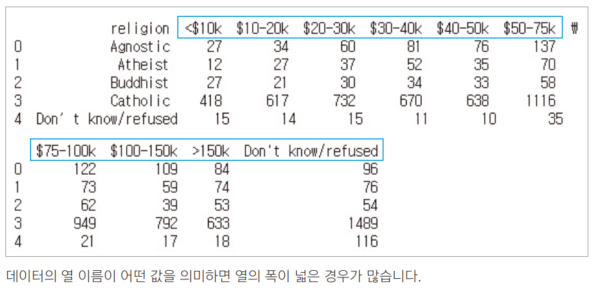
* 일반적으로 넓은 데이터는 수집(collection)과 표현(presentation)에 편한 방식이지만 데이터 분석에는 적합하지 않음
* pandas 에서 제공하는 melt 메서드를 사용하여 분석에 용이한 Tidy data 로 변환할 수 있다

## Tidy Data (깔끔한? 데이터)
데이터를 구조화하여 분석과 가시화를 용이하게 만드는 프레임워크로 아래와 같은 특징을 가진다.
* 각 행이 관찰대상이고
* 각 열이 변수이고
* 관찰단위의 각 타입이 테이블을 형성

## melt 메서드의 인자

| 메서드 인자 | 설명 |
| ---------- | --- |
| id_vars    | 위치를 그대로 유지할 열의 이름을 지정한다 |
| values_vars| 행으로 위치를 변경할 열의 이름을 지정한다(미지정시 id_vars 에 지정하지 않은 모든 열) |
| var_name   | value_vars로 위치를 변경한 열의 이름을 지정한다 |
| value_name | var_name으로 위치를 변경한 열의 데이터를 저장한 열의 이름을 지정한다 |

## melt 메서드 사용하기

### 1. 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

In [ ]:
import pandas as pd
pew = pd.read_csv('../data/pew.csv') # 퓨 리서치 센터에서 조사한 '미국의 소득과 종교'라는 데이터
print(pew.head())

In [ ]:
print(pew.iloc[:, 0:6]) # 6개의 열 출력

In [ ]:
pew_long = pd.melt(pew, id_vars='religion') # 'religion' 열을 고정하여 피벗(pivot)
print(pew_long.head())

In [ ]:
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
print(pew_long.head())

#### 2. 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

In [ ]:
billboard = pd.read_csv('../data/billboard.csv')

print(billboard.iloc[0:5, 0:16])

In [ ]:
# year, artist, track, time, date.entered 열을 모두 고정하고 나머지 열을 피벗
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
                         var_name='week', value_name='rating')

print(billboard_long.head())

# 07-2 열 이름 관리하기

## 하나의 열이 여러 의미를 가지고 있는 경우

* 예) ebola 데이터 집합 : Cases_Guinea(발생건수 + 나라이름)

### ebola 데이터 집합 살펴보기

In [ ]:
ebola = pd.read_csv('../data/country_timeseries.csv')
print(ebola.columns)

In [ ]:
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

In [ ]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
print(ebola_long.head())

## split 메서드로 열 이름 분리하기

### 열 이름 분리하고 데이터프레임에 추가하기

In [ ]:
variable_split = ebola_long.variable.str.split('_')

print(variable_split[:5])

In [ ]:
print(type(variable_split))

In [ ]:
print(type(variable_split[0]))

In [ ]:
status_values = variable_split.str.get(0) 
country_values = variable_split.str.get(1)

print(status_values[:5])

In [ ]:
print(status_values[-5:])

In [ ]:
print(country_values[:5])

In [ ]:
print(country_values[-5:])

In [ ]:
ebola_long['status'] = status_values 
ebola_long['country'] = country_values
print(ebola_long.head())

## concat 메서드를 응용하여 데이터프레임에 열 추가하기

In [ ]:
variable_split = ebola_long.variable.str.split('_', expand=True) 
variable_split.columns = ['status', 'country'] 
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)

print(ebola_parsed.head())

# 07-3 여러 열을 하나로 정리하기

## 기상 데이터의 여러 열을 하나로 정리하기 ─ melt, pivot_table 메서드

In [ ]:
weather = pd.read_csv('../data/weather.csv') 
print(weather.iloc[:5, :11])

In [ ]:
weather_melt = pd.melt(weather,
                       id_vars=['id', 'year', 'month', 'element'],
                       var_name='day',
                       value_name='temp')
print(weather_melt.head())

In [ ]:
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year', 'month', 'day'], # 행 위치에 들어갈 열
    columns='element',                    # 열 위치에 들어갈 열 (pivot할 열)
    values='temp'                         # 데이터로 사용할 열
)

print(weather_tidy)

In [ ]:
weather_tidy_flat = weather_tidy.reset_index() 
print(weather_tidy_flat.head())

# 07-4 중복 데이터 처리하기

## 빌보드 차트의 중복 데이터 처리하기

In [ ]:
billboard = pd.read_csv('../data/billboard.csv')
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
                         var_name='week', value_name='rating')

print(billboard_long.shape)

print(billboard_long.head())

In [ ]:
print(billboard_long[billboard_long.track == 'Loser'].head())

In [ ]:
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']] 
print(billboard_songs.shape)

In [ ]:
billboard_songs = billboard_songs.drop_duplicates() # 중복 데이터 제거
print(billboard_songs.shape)

In [ ]:
billboard_songs['id'] = range(len(billboard_songs)) # id 추가
print(billboard_songs.head(n=10))

In [ ]:
billboard_ratings = billboard_long.merge(billboard_songs, on=['year', 'artist', 'track', 'time']) 
print(billboard_ratings.shape)

In [ ]:
print(billboard_ratings.head())

## 여러 개로 나누어진 데이터 불러오기

### 뉴욕 택시 데이터 준비

In [ ]:
import os 
import urllib.request

# 네트워크 상태에 따라 5 ~ 15분이 소요됩니다.
with open('../data/raw_data_urls.txt', 'r') as data_urls:
    for line, url in enumerate(data_urls):
        if line == 5:
            break 
        fn = url.split('/')[-1].strip()
        fp = os.path.join('', '../data', fn)
        print(url)
        print(fp)
        urllib.request.urlretrieve(url, fp)

In [ ]:
import glob 
nyc_taxi_data = glob.glob('../data/fhv_*') 
print(nyc_taxi_data)

In [ ]:
taxi1 = pd.read_csv(nyc_taxi_data[0]) 
taxi2 = pd.read_csv(nyc_taxi_data[1]) 
taxi3 = pd.read_csv(nyc_taxi_data[2]) 
taxi4 = pd.read_csv(nyc_taxi_data[3]) 
taxi5 = pd.read_csv(nyc_taxi_data[4])

In [ ]:
print(taxi1.head(n=2)) 
print(taxi2.head(n=2)) 
print(taxi3.head(n=2)) 
print(taxi4.head(n=2)) 
print(taxi5.head(n=2))

In [ ]:
print(taxi1.shape) 
print(taxi2.shape) 
print(taxi3.shape) 
print(taxi4.shape) 
print(taxi5.shape)

In [ ]:
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])

print(taxi.shape)